# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Lê Trọng Đức Anh
- MSSV: 21127005
- Lớp: 21CLC05

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor,LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# Bỏ những warning của sklearn
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.loc[:, ["Salary"]].to_numpy()     # Series    (chứa 1 giá trị mục tiêu kiểm tra)
X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.loc[:,["Salary"]].to_numpy()       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây
# Xây dựng hàm chọn model theo k-fold Cross-Validation để sử dụng cho câu 1b,1c,1d
def choose_model(models,train_org,k=10,display_model=True):
    # Xáo trộn toàn bộ dữ liệu trong tập train
    train = train_org.copy()
    train = train.sample(frac=1)
    # Tạo ra k tập data con từ tập train (cross-validation)
    n=len(train)
    data_split = [train.iloc[i*(n//k):(i+1)*(n//k),:] for i in range(k)]

    count = 0 
    # Tìm ra model tốt nhất
    for model,attrs in models:
        count+=1
        list_mae=[] # Chứa mae của mỗi fold 
        for data in data_split:
            # Lấy tập dữ liệu theo tập thuộc tính đã quy định trong model
            X_train = data.loc[:,attrs].to_numpy()
            Y_train = data.loc[:,["Salary"]].to_numpy()

            # Huấn luyện model theo tập đã lấy
            lr = model.fit(X_train,Y_train)

            # Predict kết quả trên từng tập
            list_mae.append(mean_absolute_error(lr.predict(X_train),Y_train))
            
        # In ra các kết quả cross-validation như yêu cầu
        if display_model==True:
            print(attrs,":",np.mean(np.array(list_mae)))
        else:
            print("model",count,":",np.mean(np.array(list_mae)))


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [4]:
# Phần code cho yêu cầu 1a
# Lấy 11 trường dữ liệu đầu tiên trong tập test
X_train_1a = train.iloc[:,:11].to_numpy()
# Lấy 11 trường dữ liệu đầu trong tập train
X_test_1a = test.iloc[:,:11].to_numpy()

# Lấy các tham số sau khi giải hồi quy
lr_1a = LinearRegression().fit(X_train_1a,y_train)

# Format số thực cho numpy
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# In ra hệ số của hàm hồi quy
print(lr_1a.coef_)



[[-23183.330 702.767 1259.019 -99570.608 18369.962 1297.532 -8836.727
  141.760 145.742 114.643 34955.750]]


In [5]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print(mean_absolute_error(lr_1a.predict(X_test_1a),y_test))

105052.52978823165


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23183.330 * Gender + 702.767 * 10percentage + 1259.019 * 12percentage $$
 $$-99570.608 * CollegeTier +  18369.962 * Degree + 1297.532 * collegeGPA $$
$$ -8836.727 * CollegeCityTier +  141.760 * English $$
$$ + 145.742 * Logical + 114.643 * Quant + 34955.750 * Domain  $$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [6]:
# Phần code cho yêu cầu 1b

# Mỗi model là một thuộc tính trong câu 1b kèm theo lớp LinearRegression
models = [(LinearRegression(),["conscientiousness"]),(LinearRegression(),["agreeableness"]),(LinearRegression(),
        ["extraversion"]),(LinearRegression(),["nueroticism"]),(LinearRegression(),["openess_to_experience"])]
choose_model(models,train)
    

['conscientiousness'] : 124883.2382377151
['agreeableness'] : 123751.32402931941
['extraversion'] : 124665.91894778667
['nueroticism'] : 123763.7485819967
['openess_to_experience'] : 125080.1729379246


Ta thấy `agreeableness` là đặc trưng tốt nhất vì nó mae trung bình nhỏ nhất. Do đó ta sử dụng 'agreeableness' cho mô hình của chúng ta

In [7]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_personality_feature_model = "agreeableness"

# Lấy tập dữ liệu của best_personality_feature_model
X_train_1b = train.loc[:,[best_personality_feature_model]].to_numpy()
Y_train_1b = train.loc[:,["Salary"]].to_numpy()
X_test_1b = test.loc[:,[best_personality_feature_model]].to_numpy()
Y_test_1b = test.loc[:,["Salary"]].to_numpy()

# Huấn luyện mô hình
lr_1b = LinearRegression().fit(X_train_1b,Y_train_1b)

# Lấy hệ số
print(lr_1b.coef_)

[[15834.939]]


In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
print(mean_absolute_error(lr_1b.predict(X_test_1b),Y_test_1b))

118153.16335110964


Vẽ đường hồi quy trên thuộc tính `agreeableness` trên tập Test

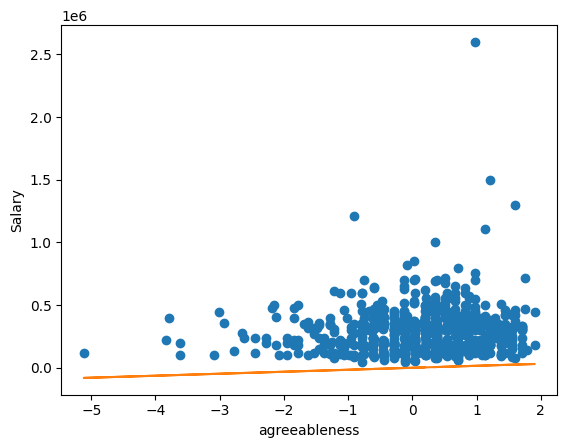

In [9]:
plt.plot(X_test_1b,Y_test_1b,'o')
plt.xlabel('agreeableness')
plt.ylabel('Salary')
plt.plot(X_test_1b,(np.array(*lr_1b.coef_))*X_test_1b)
plt.show()

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 15834.939 * agreeableness $$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [10]:
# Phần code cho yêu cầu 1c

# Mỗi model là một đặc trưng của câu 1c kèm theo lớp LinearRegression
models = [(LinearRegression(),["English"]),(LinearRegression(),["Logical"]),(LinearRegression(),["Quant"])]
choose_model(models,train)

['English'] : 120736.17385133015
['Logical'] : 120061.00526686278
['Quant'] : 117019.51087140551


Tương tự câu 1b, ta thấy `Quant` là đặc trưng tốt nhất do có mae trung bình nhỏ nhất.

In [11]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_skill_feature_model = "Quant"

# Lấy tập dữ liệu của best_skill_feature_model
X_train_1c = train.loc[:,[best_skill_feature_model]].to_numpy()
Y_train_1c = train.loc[:,["Salary"]].to_numpy()
X_test_1c = test.loc[:,[best_skill_feature_model]].to_numpy()
Y_test_1c = test.loc[:,["Salary"]].to_numpy()

# Huấn luyện mô hình
lr_1c = LinearRegression().fit(X_train_1c,Y_train_1c)

# Lấy hệ số
print(lr_1c.coef_)

[[368.852]]


In [12]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
print(mean_absolute_error(lr_1c.predict(X_test_1c),Y_test_1c))

108814.05968837196


Vẽ đường hồi quy trên thuộc tính `Quant` trên tập Test

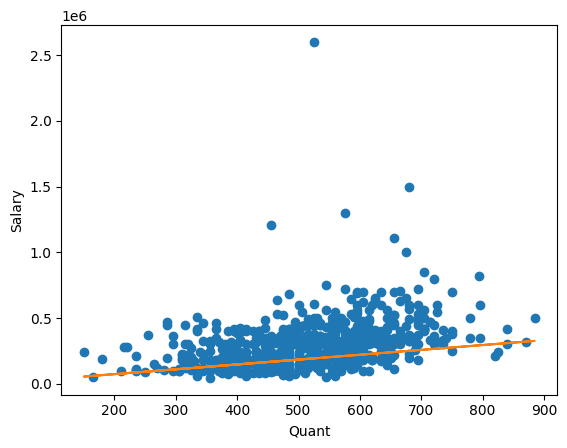

In [13]:
plt.plot(X_test_1c,Y_test_1c,'o')
plt.xlabel('Quant')
plt.ylabel('Salary')
plt.plot(X_test_1c,(np.array(*lr_1c.coef_))*X_test_1c)
plt.show()

Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 368.852 * Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

Tất cả lí thuyết và bằng chứng của mô hình đều nằm trong phần báo cáo. Giảng viên có thể đọc song song cả code và báo cáo vì ở đây em sẽ chỉ minh họa các bước tìm ra mô hình là chủ yếu

### Mô hình đầu tiên: Sử dụng toàn bộ thuộc tính được cho và sử dụng hồi quy tuyến tính để huấn luyện

In [14]:
attrs_1 = list(train.columns) # Tất cả thuộc tính
attrs_1.pop() # Bỏ cột Salary
model_1 = (LinearRegression(),attrs_1) # Dùng LinearRegression
print(model_1)

(LinearRegression(), ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'])


### Mô hình 2 ta sẽ dựa vào thực tế để xác định đặc tính. Xem trong phần báo cáo để biết thêm chi tiết

In [15]:
model_2 = (LinearRegression(),['10percentage', 'collegeGPA', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience'])

### Mô hình thứ 3 cũng sẽ sử dụng hồi quy tuyến tính. Tuy nhiên ta sẽ lựa một số đặc tính đáng chú ý để sử dụng

Ta sẽ sử dụng `Correlation Feature Selection` để tìm ra những đặc tính đáng chú ý trong mô hình và bỏ đi những đặc tính còn lại

In [16]:
# Hàm này cho ta biết mức độ ảnh hưởng của các đặc tính
def selectFeatures(X_train,Y_train):
    # Configure to select all feauture
    fs = SelectKBest(score_func=f_regression,k='all')
    
    # Learn relationship from data 
    fs.fit(X_train,Y_train)

    return fs


In ra các 'điểm số' khi làm bài test chọn mô hình

In [17]:
fs = selectFeatures(X_train,y_train)
for i,score in enumerate(fs.scores_):
    print(f'Feature {i+1}: {score}')

Feature 1: 2.944274913619532
Feature 2: 55.41576318120139
Feature 3: 51.36800845056778
Feature 4: 70.80936687669913
Feature 5: 0.6960956721049927
Feature 6: 34.19975545672874
Feature 7: 0.047009545448652226
Feature 8: 66.26953437829842
Feature 9: 82.66867307764147
Feature 10: 98.88795390256075
Feature 11: 33.94689268884023
Feature 12: 36.154186515531485
Feature 13: 0.19392212538276477
Feature 14: 20.675793773985212
Feature 15: 1.8715212393493832
Feature 16: 3.8221706749004314
Feature 17: 3.674493335920891
Feature 18: 0.585974666336772
Feature 19: 7.502266957708248
Feature 20: 10.626813838822596
Feature 21: 0.015907174898563352
Feature 22: 12.166444549758959
Feature 23: 0.1371359106523385


Vẽ biểu đồ cho mức độ quan trọng của đặc tính

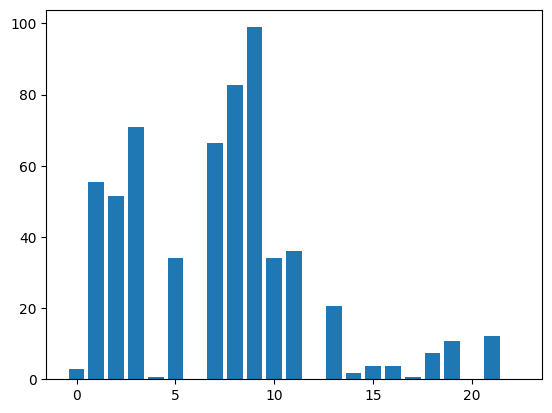

In [18]:
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

Ta sẽ lần lượt chọn tất cả các đặc tính có số điểm từ 10 trở lên và bỏ qua những đặc tính còn lại do chúng chỉ gây nhiễu 

Các đặc tính được chọn lần lượt là: `10percentage`, `12percentage`,`CollegeTier`,`collegeGPA`,`English`,`Logical`,`Quant`,`Domain`,`ComputerProgramming`,`agreeableness`,`ComputerScience`

In [19]:
model_3 = (LinearRegression(),['10percentage', '12percentage','CollegeTier','collegeGPA','English','Logical','Quant','Domain','ComputerScience','ComputerProgramming','agreeableness'])

### Mô hình thứ 4, ta sẽ cải tiến mô hình thứ 3 bằng Huber Regressor

Huber Regression hạn chế sai số do outliers gây ra. Xem thêm trong phần báo cáo để biết thêm chi tiết thuật toán

In [20]:
model_4 = (HuberRegressor(),['10percentage', '12percentage','CollegeTier','collegeGPA','English','Logical','Quant','Domain','ComputerScience','ComputerProgramming','agreeableness'])

## Thử nghiệm, so sánh các mô hình

In [21]:
# Xáo trộn toàn bộ dữ liệu trong tập train

models = [model_1,model_2,model_3,model_4]
choose_model(models,train,display_model=False)

model 1 : 112383.21538002584
model 2 : 112679.57027815464
model 3 : 112340.945311874
model 4 : 108273.83434228101


Như đã thử nghiệm bằng k-fold cross validation thì model 4 là tốt nhất nên ta sẽ sử dụng model 1 để huấn luyện cho mô hình 

In [22]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
lr_1d,my_best_model = model_4

# Lấy tập dữ liệu của my_best_model
X_train_1d = train.loc[:,my_best_model].to_numpy()
Y_train_1d = train.loc[:,["Salary"]].to_numpy()
X_test_1d = test.loc[:,my_best_model].to_numpy()
Y_test_1d = test.loc[:,["Salary"]].to_numpy()

# Huấn luyện mô hình
lr_1d.fit(X_train_1d,Y_train_1d)

# Lấy hệ số
print(lr_1d.coef_)

[813.465 618.183 -14887.593 11.623 129.314 11.924 213.761 7157.488
 -129.371 98.721 8727.450]


In [23]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
print(mean_absolute_error(lr_1d.predict(X_test_1d),Y_test_1d))

100658.21505757519


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 813.465 * 10percentage + 618.183 * 12percentage -14887.593 * CollegeTier + $$
$$ 11.623 * collegeGPA + 129.314 * English + 11.924 * Logical + $$
$$213.761 * Quant + 7157.488 * Domain -129.371 * ComputerScience + $$
$$ 98.721 * ComputerScience  + 8727.450 * agreeableness $$
